# Template Matching
---

## Set Up

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

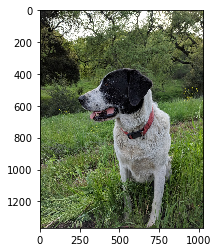

In [4]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

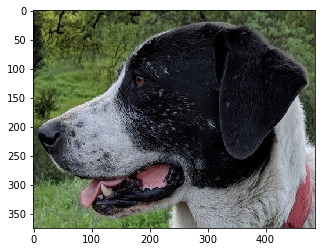

In [5]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

## Funct

In [6]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

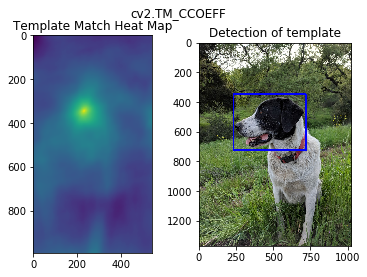

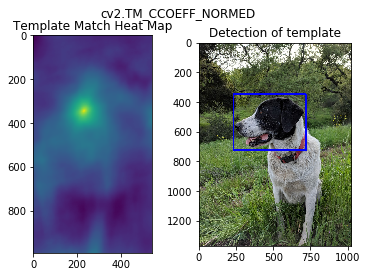

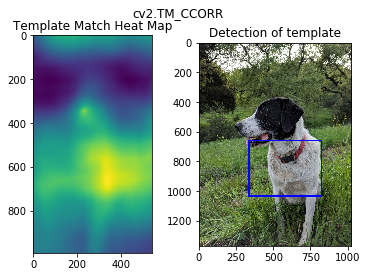

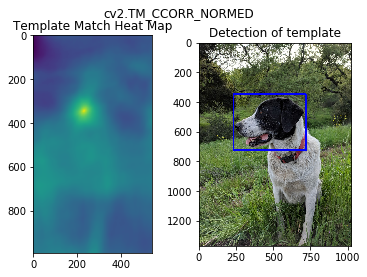

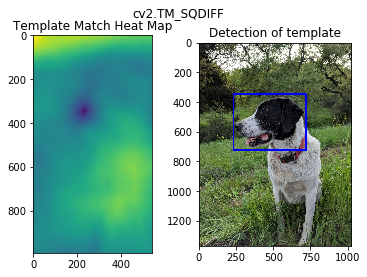

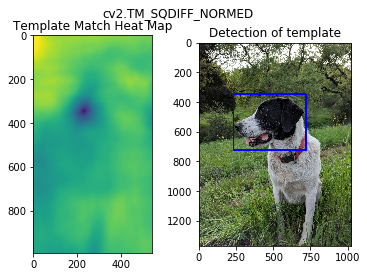

In [7]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)

    res = cv2.matchTemplate(full_copy, face, method)

    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topLeft = minLoc
    else:
        topLeft = maxLoc
    
    height, width, channel = face.shape
    bottomRight = (topLeft[0]+width, topLeft[1]+height)

    cv2.rectangle(full_copy, topLeft, bottomRight, (0,0,255), 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Template Match Heat Map')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    plt.suptitle(m)

    plt.show()
    print('\n\n')